In [1]:
import numpy as np
import ROOT
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/02


In [12]:
ntuple=ROOT.RDataFrame("ntuple","./build/output.root")
#ROOT.TNtuple.Draw("xPixel:yPixel","","colz")

In [13]:
numPix=100
histXPix=ntuple.Histo1D(("hist","hist",numPix,-0.25,0.25),"XPixel")
histXPix.SetTitle("XPixel")
histXPix.SetXTitle("Position [m]")
histXPix.SetYTitle("Counts")
histYPix=ntuple.Histo1D(("hist","hist",numPix,-0.25,0.25),"YPixel")
histYPix.SetTitle("YPixel")
histYPix.SetXTitle("Position [m]")
histYPix.SetYTitle("Counts")

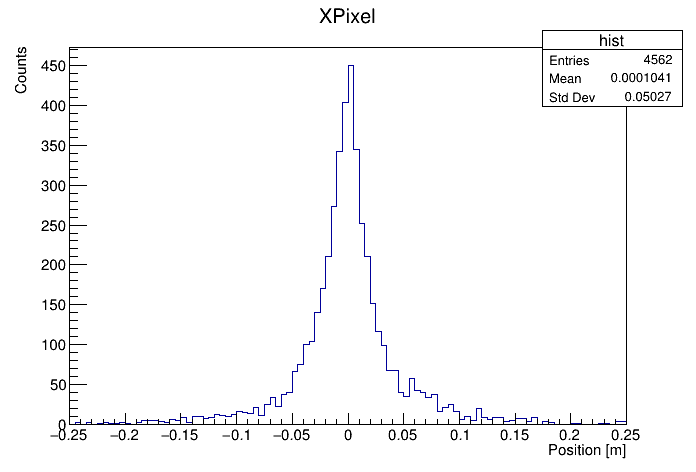

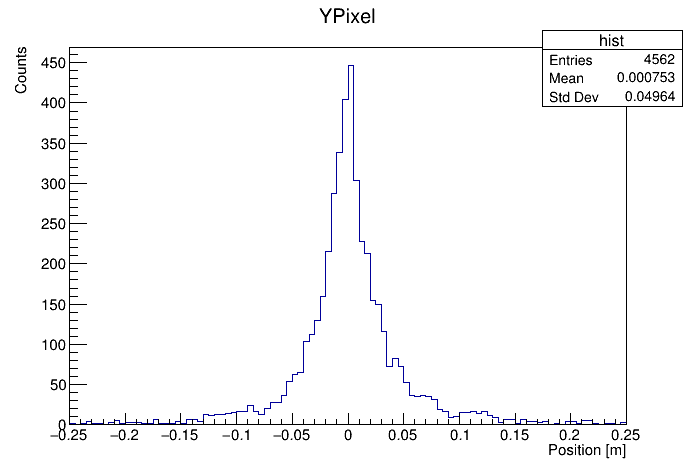

In [14]:
c=ROOT.TCanvas()
histXPix.Draw()
c.Draw()
c2=ROOT.TCanvas()
histYPix.Draw()
c2.Draw()

#Vedi come salvare in file root info sul detector

In [15]:
hist2D=ntuple.Histo2D(("hist","hist",numPix,-0.25,0.25,numPix,-0.25,0.25),"XPixel","YPixel")
hist2D.SetTitle("XPixel vs YPixel")
hist2D.SetXTitle("Position [m]")
hist2D.SetYTitle("Position [m]")
hist2D.SetZTitle("Counts")
hist2D.SetStats(0)


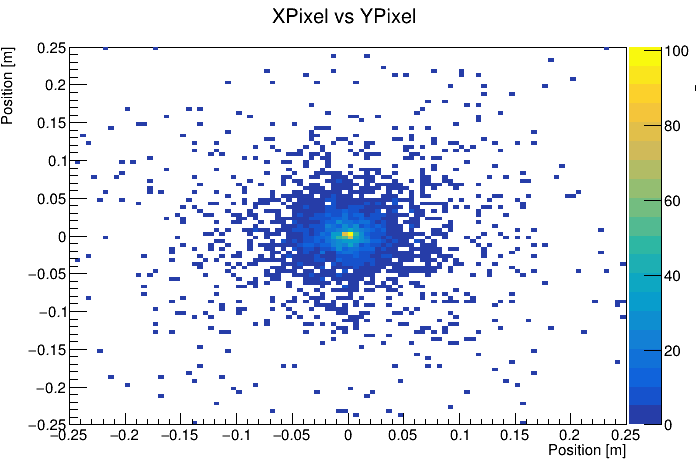

In [16]:
c3=ROOT.TCanvas()
hist2D.Draw("colz")
c3.Draw()